# Problem Set 1

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:      7.31.1 (need at least 1.0)
Numpy version:        1.21.2 (need at least 1.7.1)
SciPy version:         1.7.3 (need at least 0.12.0)
Pandas version:        1.4.1 (need at least 0.11.0)
Maplotlib version:     3.5.0 (need at least 1.2.1)
Scikit-Learn version:  1.0.2 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set]( https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

You can read more about the dataset [here](http://lib.stat.cmu.edu/datasets/boston)

Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
boston = pd.DataFrame(bdata.data)

In [5]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [6]:
# enter your code here

#1.1.1: How many different variables are there in the dataset, and how many different observations?
print(boston.shape)
print('--'*20)

#1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River?
print(sum(boston.CHAS == 1))
print('--'*20)

#1.1.3: Show that dataset does not contain any missing values.
print(boston.isnull().sum())
print('--'*20)

#1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.
boston['MEDV'] = bdata.target
highest_five = boston.sort_values(by = ['MEDV'], ascending = False).head(5)
print(highest_five['TAX'])

(506, 13)
----------------------------------------
35
----------------------------------------
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64
----------------------------------------
283    198.0
225    307.0
369    666.0
370    666.0
371    666.0
Name: TAX, dtype: float64


*Provide our answers below:*

 - 1.1.1: There are 14 different variables (13 features in the dataframe and 1 target variable called MEDV) and 506 observations
 - 1.1.2: There are 35 instances that are classified as neighborhoods where the tract bounds the Charles River
 - 1.1.3: There are no missing values in this dataset
 - 1.1.4: The property tax rate in the 5 neighborhoods that have the highest median housing price are: 198.0, 307.0, 666.0, 666.0, 666.0

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood? (As far as ties are concerned, just use the top 5 values to break the ties)
 - 1.2.2: How many neighborhoods have, on average, less than 3 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?


In [7]:
# enter your code here

#1.2.1: What is the median housing price in Boston's most expensive neighborhood? (As far as ties are concerned, just use the top 5 values to break the ties)
most_expensive = max(list(boston['MEDV']))
print(boston.loc[boston['MEDV'] == most_expensive, 'MEDV'].head(5))
print('--'*20)

#1.2.2: How many neighborhoods have, on average, less than 3 rooms per dwelling?
print(sum(boston.RM < 3))
print('--'*20)

#1.2.3: What is the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River?
adjacent = boston.loc[boston['CHAS'] == 1,['TAX','MEDV']]
least_expensive = adjacent.sort_values(by = ['MEDV'], ascending = True)
print(least_expensive)
print('--'*20)

#1.2.4: What is the crime rate in the neighborhood with the highest median housing price?
print(boston.CRIM[boston.MEDV == max(boston.MEDV)])
print('--'*20)

#1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?
print(boston.CRIM[boston.MEDV == min(boston.MEDV)])
print('--'*20)

161    50.0
162    50.0
163    50.0
166    50.0
186    50.0
Name: MEDV, dtype: float64
----------------------------------------
0
----------------------------------------
       TAX  MEDV
142  403.0  13.4
152  403.0  15.3
155  403.0  15.6
363  666.0  16.8
154  403.0  17.0
356  666.0  17.8
211  277.0  19.3
209  277.0  20.0
269  223.0  20.7
218  276.0  21.5
210  277.0  21.7
221  307.0  21.7
357  666.0  21.7
364  666.0  21.9
212  277.0  22.4
358  666.0  22.7
219  276.0  23.0
216  276.0  23.3
208  277.0  24.4
236  307.0  25.1
220  307.0  26.7
160  403.0  27.0
222  307.0  27.5
234  307.0  29.0
274  254.0  32.4
277  254.0  33.1
276  254.0  33.2
273  223.0  35.2
282  216.0  46.0
283  198.0  50.0
370  666.0  50.0
163  403.0  50.0
162  403.0  50.0
369  666.0  50.0
372  666.0  50.0
----------------------------------------
161    1.46336
162    1.83377
163    1.51902
166    2.01019
186    0.05602
195    0.01381
204    0.02009
225    0.52693
257    0.61154
267    0.57834
283    0.01501
368    4.89

*Provide our answers below:*

 - 1.2.1: The median housing price in Boston's most expensive neighborhood is 50,000 dollars
 - 1.2.2: There is no neighborhood has, on average, less than 3 rooms per dwelling
 - 1.2.3: the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River is 403.0
 - 1.2.4: The crime rates in the neighborhood with the highest median housing price are 1.46336, 1.83377, 1.51902, 2.01019, 0.05602, 0.01381, 0.02009, 0.52693, 0.61154, 0.57834, 0.01501, 4.89822, 5.66998, 6.53876, 9.2323, 8.26725 per capita by town.
 - 1.2.5: The crime rates in the neighborhood with the lowest median housing price are 38.3518, 67.9208 per capita by town.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [8]:
# enter your code here
sum_table = boston.describe().T
sum_table = sum_table.drop(['25%','75%'],axis = 1)
sum_table = sum_table.rename(columns={'50%':'median'})
sum_table.reset_index(inplace = True)
sum_table = sum_table.rename(columns = {'index':'Variable'})
sum_table

,Variable,count,mean,std,min,median,max
0,CRIM,506.0,3.613524,8.601545,0.00632,0.25651,88.9762
1,ZN,506.0,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506.0,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506.0,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506.0,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506.0,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506.0,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506.0,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506.0,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506.0,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Is the median house value in locations that are adjacent to the Charles River different from the median house value in locations that are not adjacent to the Charles River? Use a t-test to answer this question. Clearly state the null and alternative hypothesis for your test.

In [9]:
# enter your code here
Adjacent_yes = boston.MEDV[boston.CHAS == 1]
Adjacent_no = boston.MEDV[boston.CHAS == 0]

coefficient, pvalue = sp.stats.ttest_ind(Adjacent_yes, Adjacent_no, equal_var = False)
print('The p-value is: ',pvalue)

The p-value is:  0.003567170098137517


Null Hypothesis: The mean of median house value in locations that are adjacent to the Charies River and that of locations which are not adjacent to the Charles River are equivalent  
  
Alternative Hypothesis: The mean if median house value in locations that are adjacent to the Charies River and that of locations which are not adjacent to the Charles River are not equivalent  
  
Since the p-value of the t-test is 0.003567170098137517 which is quite small compared to the usual threshold 5%, we reject the null hypothesis that the prices are equivalent between these two locations

### 1.5 Simple Linear Regression

Estimate a linear regression of housing value (the dependent variable) on "% lower status of the population" (the independent variable), with no other control variables. Interpret the coefficients and standard errors. Interpret the R2 value. Based on this evidence, can you conclude anything about the causal effect of increasing the "% lower status of the population" on housing value?

In [10]:
import statsmodels.formula.api as smf

data = boston[['LSTAT','MEDV']]
x = boston[['LSTAT']]
y = boston[['MEDV']]
model = smf.ols(formula = 'y ~ x',
                data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           5.08e-88
Time:                        21:26:15   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [11]:
import statsmodels.api as sm

data = boston[['LSTAT','MEDV']]
xx = boston[['LSTAT']]
xx = sm.add_constant(xx)
yy = boston[['MEDV']]
model1 = sm.OLS(yy, xx).fit()
#model = sm.ols(formula = 'yy ~ xx',
#                data = data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           5.08e-88
Time:                        21:26:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

The coefficient for the intercept is 34.5538 and the coefficient for the variable - (% lower status of the population) is -0.9500. The formula of linear regression is y = -0.95x + 34.5538.  
The coefficient indicates that with one unit increase in (% lower status of the population), there will be -0.95 unit decrease in the house value.  
The standard errors of the coefficients are the (estimated) standard deviations of the errors in estimating them. The standard errors can be regarded as the estimated coefficient of X as the reciprocal of the signal-to-noise ratio for observing the effect of X on Y. The larger the standard error of the coefficient estimate, the worse the signal-to-noise ratio--i.e., the less precise the measurement of the coefficient.  
  
R-squared is a goodness-of-fit measure for linear regression models. It indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. The higher value of R-Squared, the more closer the model fit the dataset. In this case, we have R-square of 0.544, it seems not a quite good fit of the independent variable to the dependent variable.  
  
Based on this evidence, the causal effect of increasing the "% lower status of the population" may lead to a decrease on housing value

---

## Part 2: Histograms and Boxplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


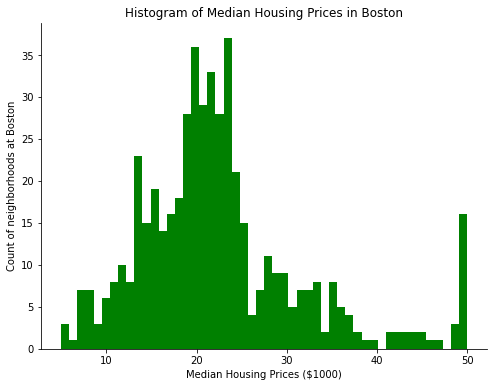

In [12]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
plt.figure(figsize=(8,6))
plt.hist(bdata.target,
         bins = 50,
         color = 'green',
         edgecolor = 'none')
plt.xlabel('Median Housing Prices ($1000)')
plt.ylabel('Count of neighborhoods at Boston')
plt.title('Histogram of Median Housing Prices in Boston')
axes = plt.subplot(111)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

### 2.2: Boxplot of housing prices

Create a **horizontal** boxplot that shows the distribution of the median value of houses (y-axis) that are adjacent to the Charles river and the houses that are not adjacent to the Charles rivers. Properly label your axes, and make sure that your graphic looks polished and professional.

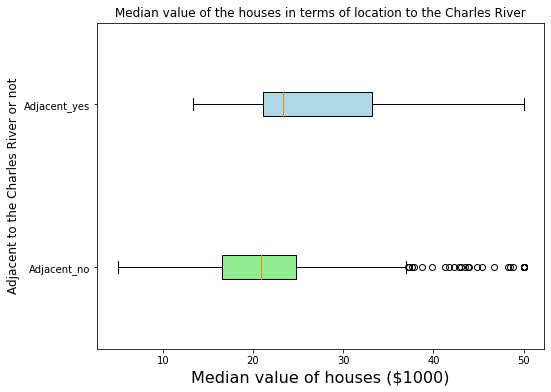

In [13]:
# enter your code here
Adjacent_no = list(Adjacent_no)
Adjacent_yes = list(Adjacent_yes)
box_plot_data = [Adjacent_no, Adjacent_yes]
plt.figure(figsize=(8,6))
box = plt.boxplot(box_plot_data,vert = 0, patch_artist = True, labels=['Adjacent_no','Adjacent_yes'])

colors = ['lightgreen','lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Median value of houses ($1000)',fontsize = 16)
plt.ylabel('Adjacent to the Charles River or not',fontsize = 12)
plt.title('Median value of the houses in terms of location to the Charles River', fontsize = 12)
plt.show()

### 2.3: Interpret

What do you observe in the above boxplots? Explain in terms of the various elements of the distribution. Does there appear to be a difference between distribution of the median housing prices adjacent to Charles river and the ones not adjacent to Charles river? 

In [14]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['min'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quantile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quantile'] = bp['boxes'][i].get_ydata()[2]
        dict1['max'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels=['Adjacent_no','Adjacent_yes']
bp = plt.boxplot([Adjacent_no,Adjacent_yes],labels=labels)
plt.close()
print(get_box_plot_data(labels, bp))

          label   min  lower_quantile  median  upper_quantile   max
0   Adjacent_no   5.0            16.6    20.9           24.80  37.0
1  Adjacent_yes  13.4            21.1    23.3           33.15  50.0


The above boxplot shows a respective distribution of median values of houses in terms of two different locations to the Charles River.  

The boxplot has the min, 25%, median, 75%, max and outliers. For ones not adjacent to Charles river, the median house value has the following attributes: the min is 5.0, the lower_quantile(25% of the sample data) is 16.6, the median is 20.9, the upper_quantile(75% of the sample data) is 24.80 and the max is 37.0. 
For ones that are adjacent to Charles River, the median house value has the following attributes: the min is 13.4, the lower quantile(25% of the sample data) is 21.1, the median is 23.3, the upper_quantile is 33.15 and the max is 50.0. Moreover, there are some outliers datapoints in the non-adjacent class.  
  
From the boxplot, we assume that there appears to be some differences between distribution of the median housing prices adjacent to Charles river and the ones not adjacent to Charles river visually. Further t-test may be conducted to verify our assumption. And the t-test from previous part indeed stated that the median house value between these two locations are of differences.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

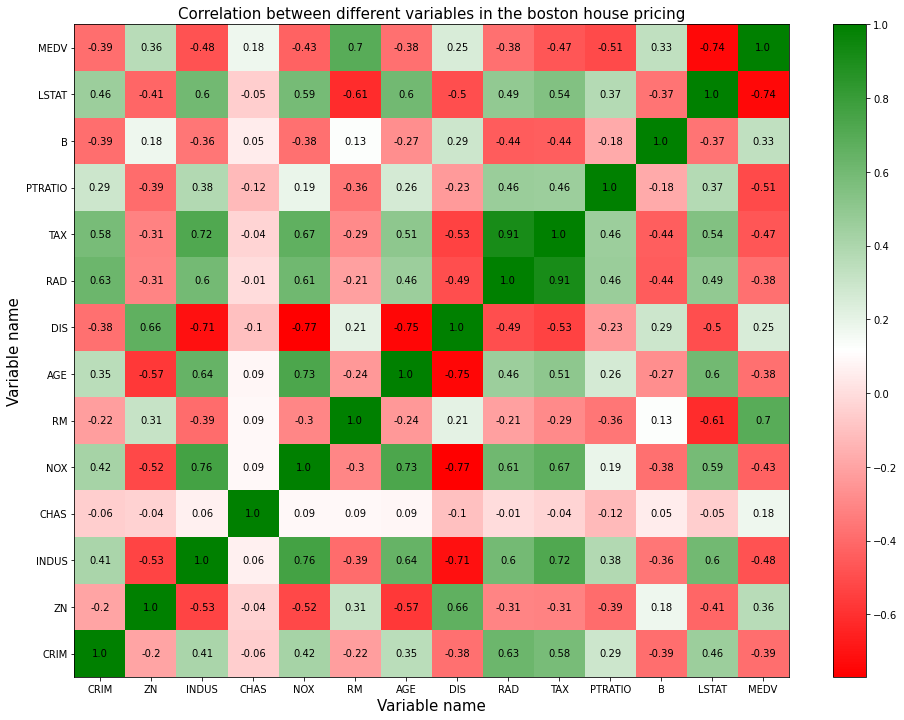

In [15]:
# enter your code here
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

LSC= LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)

fig, ax = plt.subplots(figsize=(16, 12)) 
corr = boston.corr()
p = ax.pcolormesh(corr.values, cmap=LSC)
fig.colorbar(p,ax=ax)

for i in range(len(corr)):
    for j in range(len(corr.columns)):
        ax.text(j+0.5,i+0.5, corr.values[i,j].round(2), ha="center", va="center")
plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns)
plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns)
plt.xlabel('Variable name',fontsize = 15)
plt.ylabel('Variable name',fontsize = 15)
plt.title('Correlation between different variables in the boston house pricing',fontsize= 15)
plt.show()

Most Positively Correlated: They are variable Tax(full-value property-tax rate per $10,000) and variable RAD(index of accessibility to radial highways). Their correlation value is 0.91. 
  
Most Negatively Correlated: They are variable NOX(nitric oxides concentration (parts per 10 million) and variable DIS(weighted distances to five Boston employment centres). Their correlation value is -0.77

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

Text(0.5, 1.02, 'Pairs Plot of Boston House Price')

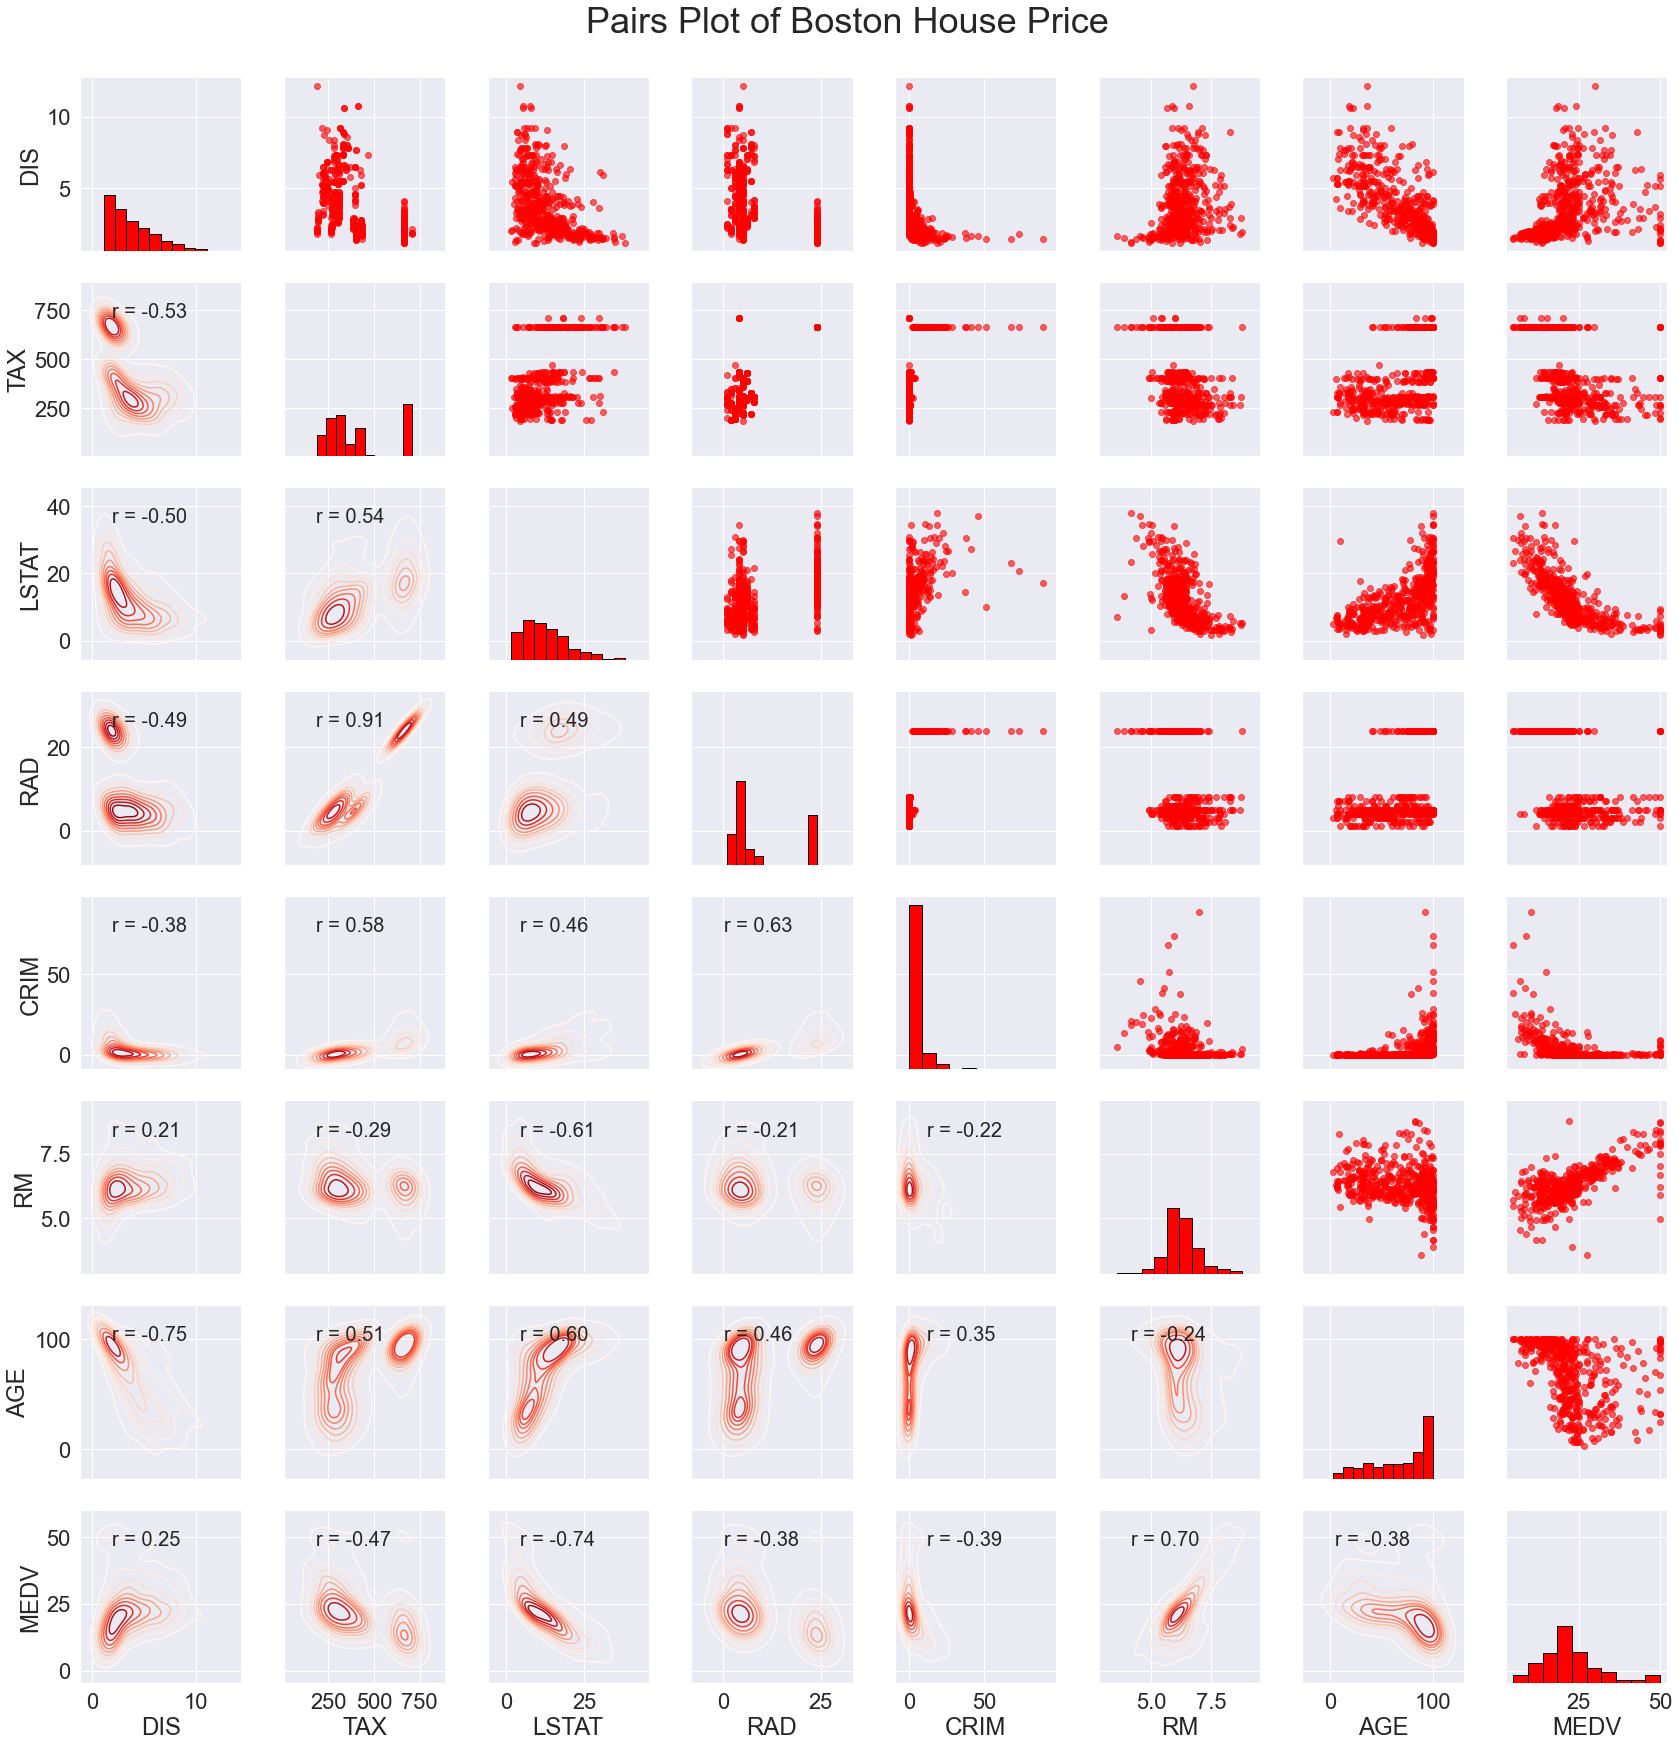

In [16]:
# enter your code here
import seaborn as sns
sns.set(font_scale = 2)
plot_data = boston[['DIS',
                    'TAX',
                    'LSTAT',
                    'RAD',
                    'CRIM',
                    'RM',
                    'AGE',
                    'MEDV']]

def corr_func(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r),
                xy = (.2,.8),
                xycoords = ax.transAxes,
                size = 20)

grid = sns.PairGrid(data = plot_data,height = 3)

grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Pairs Plot of Boston House Price', size = 36, y = 1.02)